In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
dataset=pd.read_csv("C:/Users/DINESH/Desktop/Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA and Data Visualization


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\DINESH\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

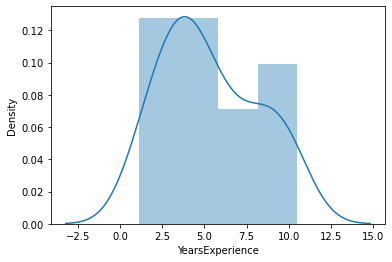

In [5]:
sns.distplot(dataset['YearsExperience'])

# Feature Engineering

In [6]:
# Renaming Columns

In [13]:
dataset=dataset.rename({' YearsExperience':' yearsexperience', 'Salary ':'salary '},axis=1)
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Correlation Analysis

In [8]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

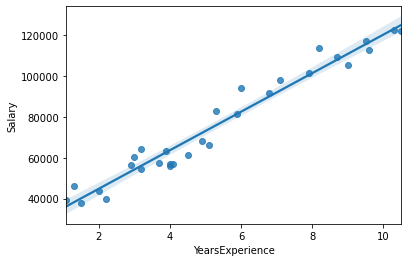

In [14]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

# Model Building

In [15]:
model=smf.ols("YearsExperience~Salary",data=dataset).fit()

# Model Testing

In [16]:
# Finding Coefficient parameter
model.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [17]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept    -7.281283
 Salary       24.950094
 dtype: float64,
 Intercept    6.300123e-08
 Salary       1.143068e-20
 dtype: float64)

In [18]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

# Model Predictions

In [19]:
# Manual prediction for say sorting time 5

Salary = (-2.383161) + (0.0001010)*(5)
Salary

-2.382656

In [20]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [21]:
data_pred=pd.DataFrame(new_data,columns=['Salary'])
data_pred

,Salary
0,5
1,8


In [22]:
model.predict(data_pred)

0   -2.382654
1   -2.382350
dtype: float64